In [10]:
import requests as rq
import numpy as np
import networkx as nx

In [11]:
topo_json = rq.get('http://0.0.0.0:8080/topology_graph').json()
topo_json

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 2}, {'id': 3}, {'id': 4}, {'id': 1}],
 'links': [{'weight': 0,
   'delay': 0,
   'packet_loss': 0,
   'source': 2,
   'target': 2},
  {'weight': 1,
   'lldpdelay': 0.008725166320800781,
   'delay': 0.01248466968536377,
   'free_bandwidth': 9999.999040319894,
   'link_usage': 0.0009596801066311123,
   'source': 2,
   'target': 1},
  {'weight': 1,
   'lldpdelay': 0.01680898666381836,
   'delay': 0.016599059104919434,
   'free_bandwidth': 9999.999360213262,
   'link_usage': 0.0006395736175882725,
   'source': 2,
   'target': 3},
  {'weight': 1,
   'lldpdelay': 0.022823810577392578,
   'delay': 0.022505640983581543,
   'free_bandwidth': 9999.999520159947,
   'link_usage': 0.00047984005331555617,
   'source': 2,
   'target': 4},
  {'weight': 0, 'delay': 0, 'packet_loss': 0, 'source': 3, 'target': 3},
  {'weight': 1,
   'lldpdelay': 0.014868974685668945,
   'delay': 0.016599059104919434,
   'free_bandwidth': 9999.999360

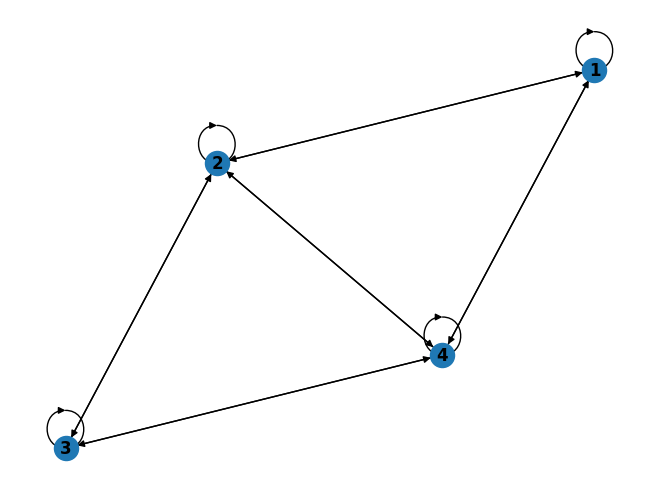

In [13]:
# json to networkx object
graph = nx.json_graph.node_link_graph(topo_json)
# plot graph
import matplotlib.pyplot as plt
nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()

In [20]:
host_json = rq.get('http://0.0.0.0:8080/hosts').json()
host_json

{'hosts': []}

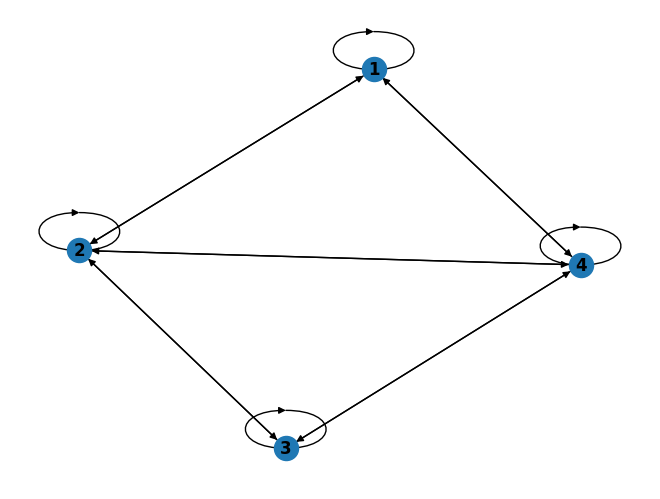

In [15]:
for host in host_json['hosts']:
    host_id = int(host['mac'].translate(str.maketrans('','',":.- ")), 16)
    graph.add_node(f'h{host_id}', type='host')
    # add bi-directional link between host and switch
    graph.add_edge(f'h{host_id}', int(host['port']['dpid']), type='host')
    graph.add_edge(int(host['port']['dpid']), f'h{host_id}', type='host')

nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()

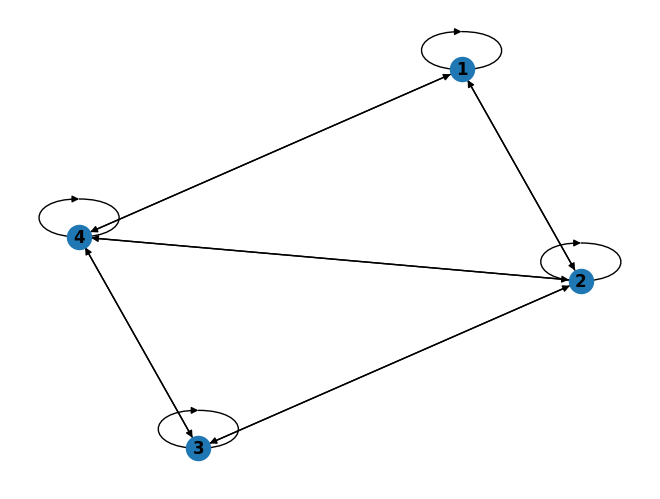

<class 'numpy.ndarray'>
[[], [2, 3, 4], [1, 3], [1, 2, 4], [1, 3]]
{2: 1, 3: 2, 4: 3, 1: 4}


In [16]:
mapping = dict(zip(graph.nodes(), range(1, len(graph.nodes())+1)))
nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()
# number of nodes
number_node = len(graph.nodes())
bin_matrix = nx.adjacency_matrix(graph).todense()
print(type(bin_matrix))
adj_matrix = [[] for i in range(number_node+1)]
for i in range(1, number_node+1):
    for j in range(1, number_node+1):
        if bin_matrix[i-1][j-1] == 1:
            adj_matrix[i].append(j)

print(adj_matrix)
print(mapping)

In [17]:
topo_json

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 2}, {'id': 3}, {'id': 4}, {'id': 1}],
 'links': [{'weight': 0,
   'delay': 0,
   'packet_loss': 0,
   'source': 2,
   'target': 2},
  {'weight': 1,
   'lldpdelay': 0.008725166320800781,
   'delay': 0.01248466968536377,
   'free_bandwidth': 9999.999040319894,
   'link_usage': 0.0009596801066311123,
   'source': 2,
   'target': 1},
  {'weight': 1,
   'lldpdelay': 0.01680898666381836,
   'delay': 0.016599059104919434,
   'free_bandwidth': 9999.999360213262,
   'link_usage': 0.0006395736175882725,
   'source': 2,
   'target': 3},
  {'weight': 1,
   'lldpdelay': 0.022823810577392578,
   'delay': 0.022505640983581543,
   'free_bandwidth': 9999.999520159947,
   'link_usage': 0.00047984005331555617,
   'source': 2,
   'target': 4},
  {'weight': 0, 'delay': 0, 'packet_loss': 0, 'source': 3, 'target': 3},
  {'weight': 1,
   'lldpdelay': 0.014868974685668945,
   'delay': 0.016599059104919434,
   'free_bandwidth': 9999.999360

In [18]:
topo_json['links']

update_delay = []
update_bandwidth = []
update_loss = []
for link in topo_json["links"]:
    #print(link)
    src = mapping[link["source"]]
    dst = mapping[link["target"]]
    if src != dst:
        delay = link["delay"]
        loss = link["packet_loss"]
        bandwidth = link["free_bandwith"]
        update_delay.append((src, dst, delay))
        update_loss.append((src, dst, loss))
        update_bandwidth.append((src, dst, bandwidth))

print(update_delay)
print(update_loss)
print(update_bandwidth)

KeyError: 'packet_loss'

In [ ]:
routes = {'route': [{
    'src_host': 240208954689493,
    'dst_host': 192340903977393
    },
    {'src_host': 192340903977393,
     'dst_host': 60024722918564}
    ]
}

In [ ]:
def get_key(dict, value):
    for key, val in dict.items():
        if val == value:
           return key

In [ ]:
request = []
for route in routes["route"]:
    # src = 'h' + str(router['src_host'])
    src = f'''h{route['src_host']}'''
    dst = f'''h{route['dst_host']}'''
    src = mapping[src]
    dst = mapping[dst]
    request.append((src, dst))

print(request)

[(4, 5), (5, 6)]


In [ ]:
from DynamicSDN.dynamicsdn.module_function import Function
from DynamicSDN.dynamicsdn.module_evole import Evolutionary
from DynamicSDN.dynamicsdn.module_memset import MemSet
from DynamicSDN.dynamicsdn.module_population import Population
from DynamicSDN.dynamicsdn.module_graph import Graph


number_host = 3
number_node = len(adj_matrix)-1
clients = []
servers = []
graph_gen = Graph(number_node, number_host, number_host, number_node - number_host, clients, servers, adj_matrix)
for band in graph_gen.predict_bandwidth:
    band = 9999
func = Function()

graph_gen.updateGraph(update_delay, update_loss, update_bandwidth)
memset = MemSet()
pop = Population()
pop.generate_population(graph_gen, func, 50, len(request),request,memset)

evol = Evolutionary()
solutions = evol.evolve1(pop, func, graph_gen, 50, 50, 0.1, 10)
result = func.select_solution(solutions)

print(result.chromosome)



[(4, 5, [4, 3, 2, 1, 5]), (5, 6, [5, 1, 2, 6])]


In [ ]:
def print_json(result, mapping):
    resul_list = []
    for request in result.chromosome:
        src = get_key(mapping,request[0])
        dst = get_key(mapping,request[1])
        src = int(src[1:])
        dst = int(dst[1:])
        path = {
            'src_host': src,
            'dst_host': dst,
            'path_dpid': request[2][1:-1]

        }
        resul_list.append(path)
    result_json = {
        "path": resul_list
    }
    return result_json  
    

In [ ]:
path = print_json(result, mapping)
path

{'path': [{'src_host': 240208954689493,
   'dst_host': 192340903977393,
   'path_dpid': [3, 2, 1]},
  {'src_host': 192340903977393,
   'dst_host': 60024722918564,
   'path_dpid': [1, 2]}]}

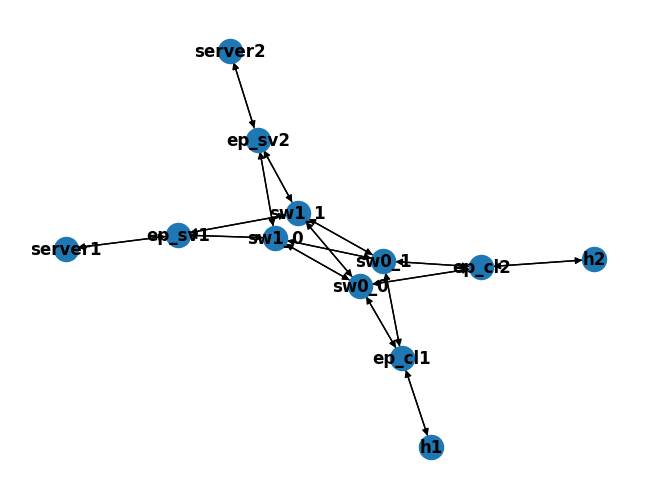